In [2]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
data = pd.read_csv('forAnalysis/data.csv')

In [4]:
nb = 'forAnalysis/Moscow/moscow_adm.shp'
regions = gpd.read_file(nb)

In [5]:
regions

,OKATO,OKTMO,RAION,OKRUGS,geometry
0,45298555,45945000,Poselenie Kievskij,Troitsky,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,45268595,45328000,Filevskij Park,Western,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,45298567,45954000,Poselenie Novofedorovskoe,Troitsky,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,45298575,45956000,Poselenie Rogovskoe,Troitsky,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,45297568,45953000,Poselenie Mosrentgen,Novomoskovsky,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."
...,...,...,...,...,...
141,45263567,45306000,Ivanovskoe,Eastern,"POLYGON ((37.79981 55.76232, 37.79981 55.76243..."
142,45263573,45308000,Kosino-Uhtomskoe,Eastern,"POLYGON ((37.83602 55.70978, 37.83620 55.71008..."
143,45263579,45310000,Novokosino,Eastern,"POLYGON ((37.84042 55.73049, 37.84063 55.73196..."
144,45290574,45391000,Nekrasovka,South-Eastern,"POLYGON ((37.90613 55.70626, 37.90701 55.70699..."


In [4]:
ru_raions = 'Поселение Киевское, Филевский парк, Поселение Новофедоровское, Поселение Роговское, Поселение Мосрентген, Поселение Вороновское, Поселение Михайлово-Ярцевское, Поселение Марушкинское, Поселение Первомайское, Матушкино, Внуково, Савельки, Поселение Внуковское, Силино, Поселение Кокошкино, «Крюково», «Щукино», «Поселение Краснопахорское», «Нагатинский Затон», «Старое Крюково», «Поселение Кленовское», Дмитровское, Поселение Филимонковское, Троицкий округ, «Теплый стан», «Поселение Щаповское», «Поселение Московский», Поселение Десёновское, Ховрино, Ломоносовское, Можайское, «Ново-Переделкино», «Строгино», «Молжаниновское», «Митино», Куркино, Крылатское, Солнцево, Поселение Сосенское, Поселение Воскресенское, Головинское, Южное Тушино, «Северное Тушино», «Черемушки», «Покровское Стрешнево», «Хорошево-Мневники», «Очаково-Матвеевское», «Тропарево-Никулино», «Левобережное», «Фили Давыдково», «Обручевское», Поселение Рязановское, Раменки, Войковское, Сокол, «Западное Дегунино», «Проспект Вернадского», «Южное Бутово», «Ясенево», «Дорогомилово», «Коньково», «Хорошевское», «Беговое», «Коптево», «Поселение Щербинка», «Аэропорт», «Пресненское», «Северное», «Бескудниковское», «Гагаринское», «Тимирязевское», «Северное Бутово», «Лианозово», «Хамовники», «Восточное Дегунино», «Савеловское», «Академическое», «Зюзино», «Алтуфьевское», «Марфино», «Чертаново Центральное», «Отрадное», «Арбат», «Чертаново Южное», «Бутырское», «Тверское», «Чертаново Северное», «Якиманка», «Котловка», «Останкинское», Донское, Бибирево, Бирюлево Западное, Марьина Роща, «Нагорное», «Свиблово», «Даниловское», «Мещанское», «Южное Медведково», «Замоскворечье», «Северное Медведково», «Нагатино-Садовники», «Москворечье-Сабурово», «Царицыно», «Басманное», «Красносельское», «Ростокино», «Таганское», «Алексеевское», «Сокольники», «Бирюлево Восточное», «Бабушкинское», «Южнопортовое», «Ярославское», «Печатники», Богородское, Метрогородок, Лефортово, «Орехово-Борисово Северное», «Лосиноостровское», «Нижегородское», «Перово», «Орехово-Борисово Южное», «Марьино», «Вешняки», «Преображенское», «Соколиная гора», «Люблино», «Текстильщики», Братеево, Зябликово, Рязанский, Измайлово, Новогиреево, «Кузьминки», «Гольяново», «Северное Измайлово», «Капотня», Выхино-Жулебино, Восточное, Восточное Измайлово, «Ивановское», «Косино-Ухтомское», «Новокосино», «Некрасовка», «Кунцево»'\
.replace(', ',  ",").replace('«', "").replace('»', "")\
.replace('Бескудниковское', "Бескудниковский").replace('Бутырское', "Бутырский")\
.replace('Басманное', "Басманный").replace('Красносельское', "Красносельский")\
.replace('Таганское', "Таганский").replace('Бабушкинское', "Бабушкинский")\
.replace('Ярославское', "Ярославский").replace('Лосиноостровское', "Лосиноостровский")\
.replace('Дмитровское', "Дмитровский").replace('Гагаринское', "Гагаринский")\
.replace('Троицкий округ', "Троицк москва").replace('Ломоносовское', "Ломоносовский")\
\
.replace('Головинское', "Головинский").replace('Левобережное', "Левобережный")\
.replace('Хорошевское', "Хорошевский").replace('Беговое', "Беговой")\
.replace('Тимирязевское', "Тимирязевский").replace('Алтуфьевское', "Алтуфьевский")\
.replace('Тверское', "Тверской").replace('Останкинское', "Останкинский")\
.replace('Мещанское', "Мещанский").replace('Донское', "Донской")\
.split(",")

regions["Район"] = ru_raions

In [1]:
regions

NameError: name 'regions' is not defined

In [6]:
offers_data = pd.DataFrame()
for i in range(101):
    file_path = f"/Users/fuckingbell/Programming/Pet Project/offers/M_0-100/offers ({i}).xlsx"
    file_it = pd.read_excel(file_path)
    if file_it.empty:
        print(i)
    file_it['RAION'] = regions["RAION"][i]
    offers_data = offers_data.append(file_it)
#     offers_data = pd.concat([offers_data, file_it])
for i in range(45):
    file_path = f"/Users/fuckingbell/Programming/Pet Project/offers/M_101-145/offers ({i}).xlsx"
    file_it = pd.read_excel(file_path)
    if file_it.empty:
        print(i)
    file_it['RAION'] = regions["RAION"][101 +i]
    offers_data = pd.concat([offers_data, file_it], ignore_index=True)

In [7]:
offers_data["price"] = offers_data["Цена"].str.replace(' .+', '').astype(float)
offers_data["square"] = offers_data["Площадь, м2"].str.replace('/.+', '').astype(float)

In [29]:
prices_data = offers_data.groupby("RAION").agg({"price":"sum", "square":"sum"})
prices_data["average_price"] = prices_data.price / prices_data.square
prices_data.sort_values("average_price")

,price,square,average_price
RAION,,,
Poselenie Klenovskoe,1.570800e+08,1843.30,85216.730863
Poselenie Rogovskoe,1.130700e+08,1198.56,94338.205847
Poselenie Pervomajskoe,1.315083e+09,11150.92,117934.889229
Poselenie Novofedorovskoe,9.731921e+08,7980.16,121951.451349
Poselenie Voronovskoe,1.355400e+08,1104.20,122749.500996
...,...,...,...
Arbat,1.813815e+10,27225.46,666219.970131
Jakimanka,2.453565e+10,36397.48,674102.983393
Hamovniki,2.632201e+10,38512.31,683469.977444


In [30]:
# merged = regions.merge(prices_data.reset_index(), on="Район", how="outer")

# merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'count']].sample(5)

In [42]:
merged = regions.set_index('RAION').join(prices_data[["average_price"]])
merged["center"] = merged.geometry.apply(lambda x: x.centroid)


needed_data = merged[merged.columns[-3:]].reset_index()
merged

,OKATO,OKTMO,OKRUGS,geometry,average_price,center
RAION,,,,,,
Poselenie Kievskij,45298555,45945000,Troitsky,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55...",160727.940052,POINT (36.90048 55.38783)
Filevskij Park,45268595,45328000,Western,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",369441.184341,POINT (37.48685 55.74925)
Poselenie Novofedorovskoe,45298567,45954000,Troitsky,"POLYGON ((36.80357 55.45162, 36.80451 55.46551...",121951.451349,POINT (36.94721 55.44383)
Poselenie Rogovskoe,45298575,45956000,Troitsky,"POLYGON ((36.93724 55.24139, 36.93726 55.24161...",94338.205847,POINT (37.06466 55.22056)
Poselenie Mosrentgen,45297568,45953000,Novomoskovsky,"POLYGON ((37.43956 55.62731, 37.44018 55.63042...",209440.933049,POINT (37.46581 55.61879)
...,...,...,...,...,...,...
Ivanovskoe,45263567,45306000,Eastern,"POLYGON ((37.79981 55.76232, 37.79981 55.76243...",218281.884046,POINT (37.82403 55.77133)
Kosino-Uhtomskoe,45263573,45308000,Eastern,"POLYGON ((37.83602 55.70978, 37.83620 55.71008...",218468.680040,POINT (37.88345 55.71620)
Novokosino,45263579,45310000,Eastern,"POLYGON ((37.84042 55.73049, 37.84063 55.73196...",227198.630266,POINT (37.86184 55.74007)


In [53]:
np.concatenate(needed_data["center"][1].coords.xy)


# a < b
# lower_bound = a + 3/8*b - 3/8*a 
# upper_bound = b - 3/8*b + 3/8*a

array([37.48684892, 55.74924933])

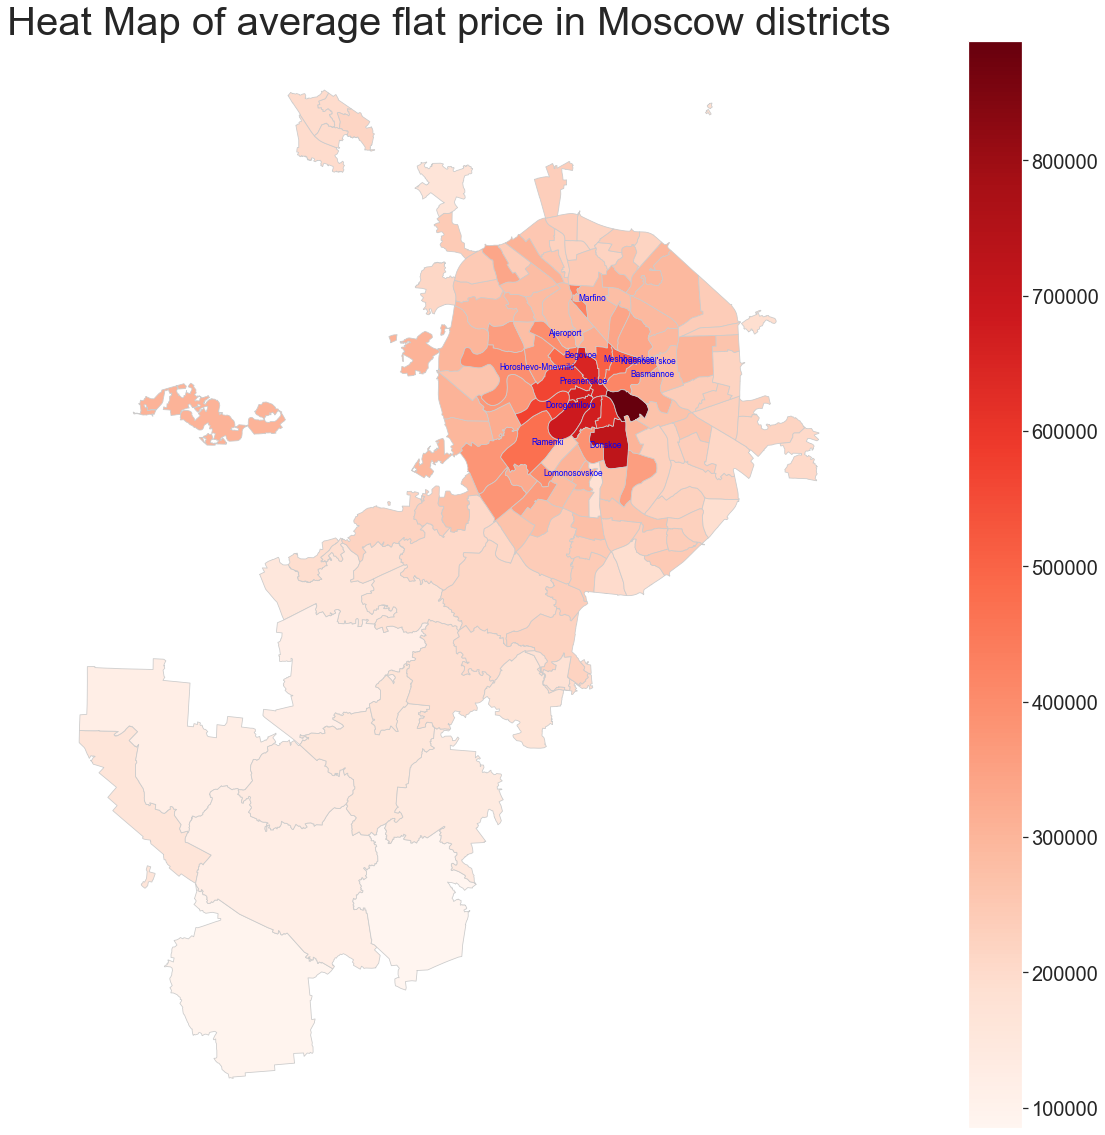

In [72]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of average flat price in Moscow districts',
                     fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Reds'
# price borders
vmin, vmax, vmean = needed_data.average_price.min(), \
                    needed_data.average_price.max(), needed_data.average_price.mean()

sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

needed_data.plot('average_price', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

lower_bound, upper_bound = 5/8 * vmin + 3/8 * vmax, 5/8 * vmax + 3/8 * vmin
# lower_bound, upper_bound = vmean, 3/4 * vmax + 1/4 * vmin
for idx, row in needed_data.iterrows():
    if lower_bound < row['average_price'] and row['average_price'] < upper_bound:
        plt.annotate(text=row['RAION'], xy=np.concatenate(row["center"].coords.xy),
                 horizontalalignment='left', fontsize='small', color='blue', wrap=True)
plt.show()

In [7]:
for idx, row in merged.iterrows():
    if(row['count'] > 50):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

NameError: name 'merged' is not defined

In [37]:
merged.iterrows()

<generator object DataFrame.iterrows at 0x7fb03681f580>